*forecast gold price*

In [ ]:
!pip install yfinance

Data collection

In [ ]:
import yfinance as yf
import pandas as pd

# Fetch gold price data
gold = yf.Ticker("GC=F")  # GC=F is the ticker symbol for Gold Futures on Yahoo Finance
hist = gold.history(period="max")  # fetches the maximum historical data available

# Clean and save the dataset
df = pd.DataFrame(hist)
df = df.reset_index()
df = df[['Date', 'Close']]  # 'Close' column indicates the closing price, but you can get other columns like 'Open', 'High', 'Low' etc.
df.columns = ['Date', 'Price']
df.to_csv('gold_prices.csv', index=False)

print("Gold prices dataset saved to 'gold_prices.csv'")


Gold prices dataset saved to 'gold_prices.csv'


In [ ]:
df

,Date,Price
0,2000-08-30 00:00:00-04:00,273.899994
1,2000-08-31 00:00:00-04:00,278.299988
2,2000-09-01 00:00:00-04:00,277.000000
3,2000-09-05 00:00:00-04:00,275.799988
4,2000-09-06 00:00:00-04:00,274.200012
...,...,...
5806,2023-10-23 00:00:00-04:00,1976.300049
5807,2023-10-24 00:00:00-04:00,1975.000000
5808,2023-10-25 00:00:00-04:00,1984.099976
5809,2023-10-26 00:00:00-04:00,1987.199951


Extract feature

In [ ]:
# Ensure the 'Date' column is of datetime dtype
df['Date'] = pd.to_datetime(df['Date'])

# Extract features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['dayofweek'] = df['Date'].dt.weekday  # Monday=0, Sunday=6
df['Weekday'] = df['dayofweek'].apply(lambda x: 1 if x < 5 else 0)  # 1 if it's Sat or Sun, else 0
df['Weekend'] = df['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)  # 1 if it's Sat or Sun, else 0
df['Week_of_Year'] = df['Date'].dt.isocalendar().week

In [ ]:
df

,Date,Price,Year,Month,Day,dayofweek,Weekday,Weekend,Week_of_Year
0,2000-08-30 00:00:00-04:00,273.899994,2000,8,30,2,1,0,35
1,2000-08-31 00:00:00-04:00,278.299988,2000,8,31,3,1,0,35
2,2000-09-01 00:00:00-04:00,277.000000,2000,9,1,4,1,0,35
3,2000-09-05 00:00:00-04:00,275.799988,2000,9,5,1,1,0,36
4,2000-09-06 00:00:00-04:00,274.200012,2000,9,6,2,1,0,36
...,...,...,...,...,...,...,...,...,...
5806,2023-10-23 00:00:00-04:00,1976.300049,2023,10,23,0,1,0,43
5807,2023-10-24 00:00:00-04:00,1975.000000,2023,10,24,1,1,0,43
5808,2023-10-25 00:00:00-04:00,1984.099976,2023,10,25,2,1,0,43
5809,2023-10-26 00:00:00-04:00,1987.199951,2023,10,26,3,1,0,43


In [ ]:
# Extract gold prices from previous days
df['Price_1_day_prior'] = df['Price'].shift(1)
df['Price_2_days_prior'] = df['Price'].shift(2)
df['Price_3_days_prior'] = df['Price'].shift(3)

In [ ]:
df = df.dropna()

In [ ]:
df = df.drop('Date', axis=1)

In [ ]:
df

,Price,Year,Month,Day,dayofweek,Weekday,Weekend,Week_of_Year,Price_1_day_prior,Price_2_days_prior,Price_3_days_prior
3,275.799988,2000,9,5,1,1,0,36,277.000000,278.299988,273.899994
4,274.200012,2000,9,6,2,1,0,36,275.799988,277.000000,278.299988
5,274.000000,2000,9,7,3,1,0,36,274.200012,275.799988,277.000000
6,273.299988,2000,9,8,4,1,0,36,274.000000,274.200012,275.799988
7,273.100006,2000,9,11,0,1,0,37,273.299988,274.000000,274.200012
...,...,...,...,...,...,...,...,...,...,...,...
5806,1976.300049,2023,10,23,0,1,0,43,1982.500000,1968.400024,1955.300049
5807,1975.000000,2023,10,24,1,1,0,43,1976.300049,1982.500000,1968.400024
5808,1984.099976,2023,10,25,2,1,0,43,1975.000000,1976.300049,1982.500000
5809,1987.199951,2023,10,26,3,1,0,43,1984.099976,1975.000000,1976.300049


In [ ]:
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = df.drop('Price', axis=1)
y = df['Price']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train

,Year,Month,Day,dayofweek,Weekday,Weekend,Week_of_Year,Price_1_day_prior,Price_2_days_prior,Price_3_days_prior
4419,2018,4,19,3,1,0,16,1351.199951,1347.199951,1347.500000
5636,2023,2,17,4,1,0,7,1842.000000,1834.199951,1854.000000
4150,2017,3,23,3,1,0,12,1249.300049,1246.099976,1233.599976
2865,2012,2,9,3,1,0,6,1729.300049,1746.400024,1722.800049
4699,2019,5,31,4,1,0,22,1287.099976,1280.599976,1276.500000
...,...,...,...,...,...,...,...,...,...,...
3775,2015,9,23,2,1,0,39,1125.000000,1133.099976,1138.099976
5194,2021,5,18,1,1,0,20,1867.500000,1837.900024,1823.800049
5229,2021,7,8,3,1,0,27,1801.500000,1793.500000,1782.599976
5393,2022,3,2,2,1,0,9,1942.400024,1899.400024,1886.500000


In [ ]:
X_test

,Year,Month,Day,dayofweek,Weekday,Weekend,Week_of_Year,Price_1_day_prior,Price_2_days_prior,Price_3_days_prior
504,2002,9,11,2,1,0,37,317.899994,321.299988,319.899994
3166,2013,4,24,2,1,0,17,1408.599976,1421.000000,1395.300049
3957,2016,6,14,1,1,0,24,1284.400024,1273.400024,1270.199951
4278,2017,9,25,0,1,0,39,1293.300049,1290.599976,1312.000000
4901,2020,3,19,3,1,0,12,1477.300049,1524.900024,1485.900024
...,...,...,...,...,...,...,...,...,...,...
2083,2009,1,2,4,1,0,1,883.599976,869.299988,874.599976
2918,2012,4,26,3,1,0,17,1641.400024,1643.000000,1631.900024
4778,2019,9,23,0,1,0,39,1507.300049,1498.400024,1507.500000
610,2003,2,13,3,1,0,7,352.600006,362.500000,363.700012


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Train

In [ ]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Eval

RMSE: 13.59933821099361


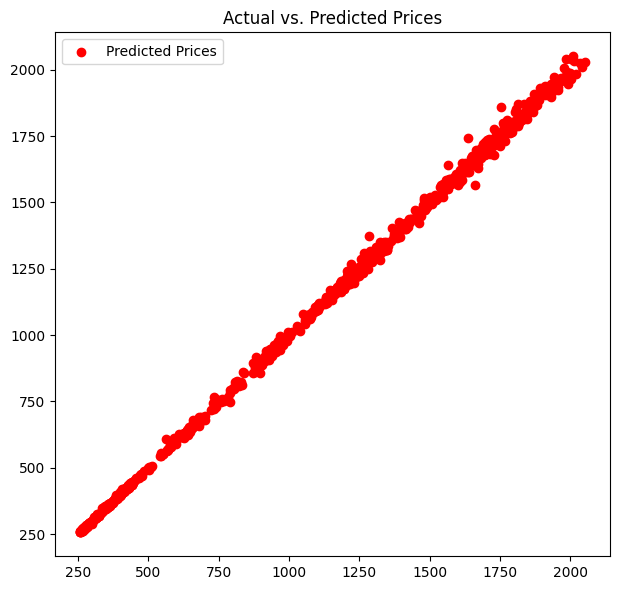

In [ ]:
# Predict gold prices
y_pred = model.predict(X_test)

# Calculate and print RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Actual vs. Predicted Prices')
# plt.scatter(X_test, y_test, color='blue', label='True Prices')
plt.scatter(y_test, y_pred, color='red', label='Predicted Prices')
plt.legend()

# plt.subplot(1, 2, 2)
# plt.title('Gold Price Over Time')
# plt.plot(X, y, color='blue')
# plt.plot(X_test, y_pred, color='red')

plt.tight_layout()
plt.show()

In [ ]:
df

,Price,Year,Month,Day,dayofweek,Weekday,Weekend,Week_of_Year,Price_1_day_prior,Price_2_days_prior,Price_3_days_prior
3,275.799988,2000,9,5,1,1,0,36,277.000000,278.299988,273.899994
4,274.200012,2000,9,6,2,1,0,36,275.799988,277.000000,278.299988
5,274.000000,2000,9,7,3,1,0,36,274.200012,275.799988,277.000000
6,273.299988,2000,9,8,4,1,0,36,274.000000,274.200012,275.799988
7,273.100006,2000,9,11,0,1,0,37,273.299988,274.000000,274.200012
...,...,...,...,...,...,...,...,...,...,...,...
5806,1976.300049,2023,10,23,0,1,0,43,1982.500000,1968.400024,1955.300049
5807,1975.000000,2023,10,24,1,1,0,43,1976.300049,1982.500000,1968.400024
5808,1984.099976,2023,10,25,2,1,0,43,1975.000000,1976.300049,1982.500000
5809,1987.199951,2023,10,26,3,1,0,43,1984.099976,1975.000000,1976.300049


In [ ]:
temp = pd.DataFrame()
temp['Date'] = "2023-10-30"
temp['Date'] = pd.to_datetime(temp['Date'])
temp

,Date


In [ ]:
temp['Day'] = temp['Day'] + 1


In [ ]:
X_test.sample(1)

,Year,Month,Day,dayofweek,Weekday,Weekend,Week_of_Year,Price_1_day_prior,Price_2_days_prior,Price_3_days_prior
5809,2023,10,26,3,1,0,43,1984.099976,1975.0,1976.300049


In [ ]:
model.predict([[2023,10,30,0,1,0,44,1984.099976,1987.199951,1988.599976]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1984.02967045])

In [ ]:
model.predict([[2023,10,31,1,1,0,44,1987.199951,1988.599976,1984.02967045]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1987.07321237])

In [ ]:
model.intercept_ # C

-143.44421596374787

In [ ]:
model.rank_

8

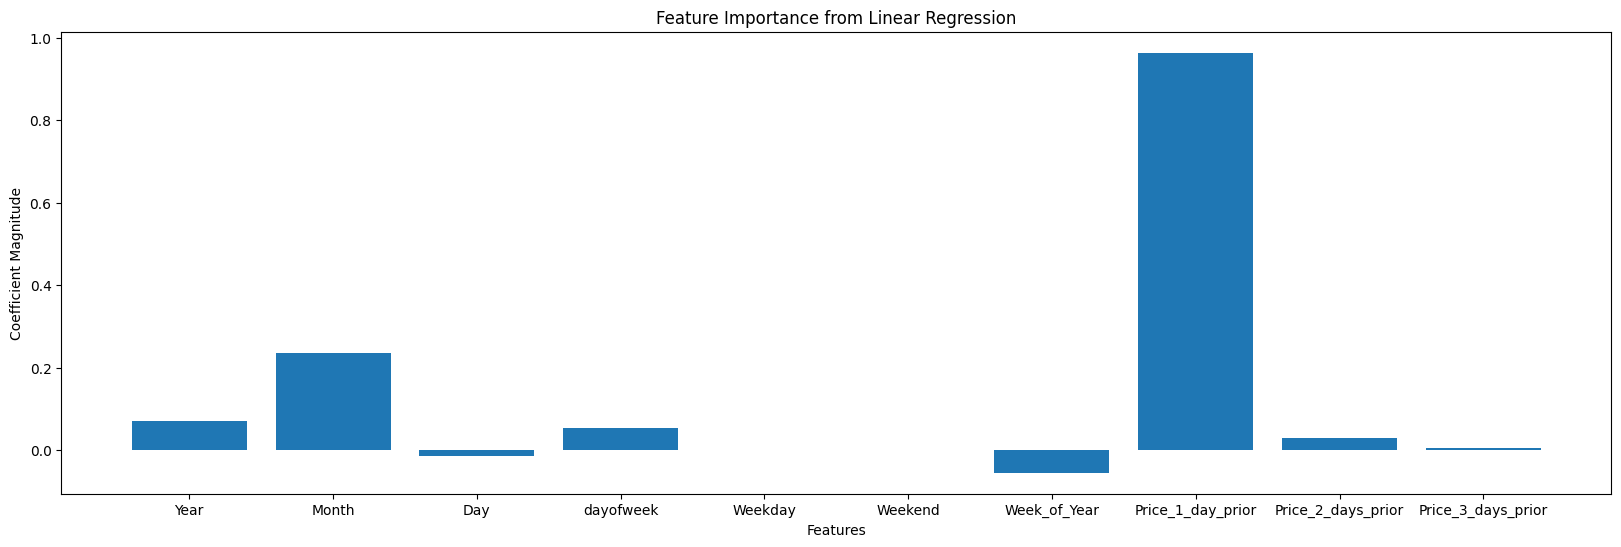

In [ ]:
# Get feature importance (coefficients)
feature_importance = model.coef_

# Plot feature importance
plt.figure(figsize=(20, 6))
plt.bar(X.columns, feature_importance)
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.title('Feature Importance from Linear Regression')
plt.show()